# TD 3 : Le modèle Leaky Integrate-and-Fire (LIF)
---

In [1]:
# import necessary modules for numerics and plotting
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 1. Le modèle Integrate-and-Fire 

La dynamique sous-seuil d'un neurone "Integrate-and-Fire" est décrit par l'équation 
$$\tau \frac{dV}{dt} = -V + RI.$$
Ici, $V$ est le potentiel de la membrane, $\tau$ est la constante de temps de la membrane, $R$ la résistance d'entrée, et $I$ représente un courant injecté dans le neurone. Pour faire simple, tous les potentiels sont mésurés rélatif au potentiel de repos $E_L$, qui pour cette raison n'apparaît plus dans l'équation. 

Chaque fois que le potentiel excède un seuil $V_{\rm seuil}$, on considère que le neurone emet un potentiel d'action, et le potentiel membranaire est remis à une valeur de "reset", $V\to V_{\rm reset}$.

Considérons les paramètres suivants : $\tau=20$ ms et $R=1$ MOhm pour la dynamique sous-seuil, et $V_{\rm seuil}=20$ mV avec $V_{\rm reset}=0$ mV pour le mécanisme de décharge. 

Remarque : Si nous allons spécifier le courant $I$ en nA, nous pouvons calculer le produit $R*I$ sans dévoir transformer des unités, puisque MOhm x nA = mV. 



## 1.1 Solution analytique de la dynamique sous-seuil du modèle Integrate-and-Fire

Quel est le potentiel de la membrane stationnaire - ou le point fixe - pour $t\rightarrow \infty$ si on considère *uniquement la dynamique sous-seuil* spécifiée ci-dessus, c'est-à-dire en faisant abstraction du mécanisme de décharge ? 

Vérifiez que $$V(t) = RI + (V_0 - RI) \exp(-t/\tau)$$ est une solution de l'équation différentielle donnée plus haut, avec la condition initiale $V(t=0) = V_0$ et si on considère que le courant $I$ est constant dans le temps. 

**Indice**: Rappelez-vous que $\frac{d}{dt} \left( e^{f(t)} \right) = e^{f(t)} \frac{df(t)}{dt}$

In [2]:
# calcul et réponses sur papier

**Solution :** 
$\frac{dV}{dt} = \frac{d}{dt} \left[RI + (V_0-RI) e^{-t/\tau}\right] =  \ldots $

In [3]:
# Plottez la solution pour les paramètres données plus haut 
# et la valeur initiale V0 = Vreset

## 1.2 L'activité de décharge du neurone Integrate-and-Fire

Dans le modèle Integrate-and-Fire, un potentiel d'action est déclenché lorsque le potentiel de membrane atteint un seuil $V_{\rm seuil}$. Le potentiel est remis à $V \rightarrow V_{\rm reset}$ après le potentiel d'action. 

**Dans quelle condition, c'est-à-dire pour quel courant injecté, le neurone déclenche-t-il des potentiels d'action ?**

Veuillez dériver l'expression analytique du taux de décharge $f(t)$ en fonction de l'input externe $I$. 

**Indice :** Calculez d'abord combien de temps $T$ il faut pour passer de $V(t=0)=V_{\rm reset}$ à $V(T)=V_{\rm seuil}$. Ce temps $T$ entre deux spikes dépend du courant injecté, $T=T(I)$. Le taux de décharge en fonction de l'input est alors donné par $f(I) = 1/T(I)$. Tracez le taux de décharge $f$ en fonction de l'entrée $I$.

In [4]:
# calcul et réponses sur papier

**Solution :** 
$V_{\rm seuil}= V(T) =  \ldots $


$$\Rightarrow\ \ T = \ldots  $$

In [5]:
# Plottez la courbe f-I du LIF avec 
# les paramètres choisis

R = 1 # MOhm
tau = 20 # ms
Vseuil = 20 # mV
Vreset = 0. 

def fI_analytique(I):
    T = -tau*np.log((Vseuil-R*I)/(Vreset-R*I)) # ms
    return 1e3/T # Hz




In [6]:
Ivals = np.arange(15,25,0.01) # uA (uA*MOhm = mV)

fvals = fI_analytique(Ivals)


/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in log
  # Remove the CWD from sys.path while we load stuff.


In [7]:
#fvals

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in log
  # Remove the CWD from sys.path while we load stuff.


Text(0, 0.5, 'f (Hz)')

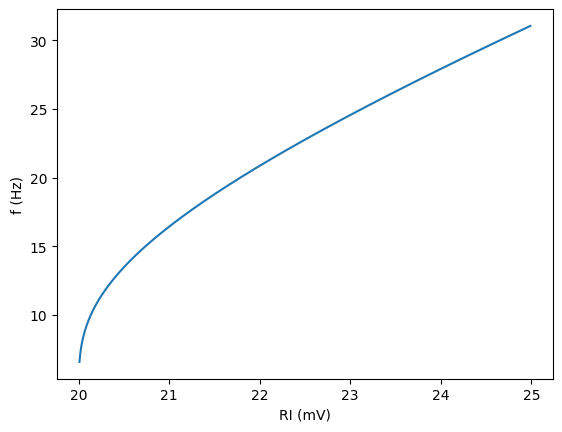

In [8]:
fig, ax = plt.subplots()
ax.plot(Ivals, fI_analytique(Ivals))
ax.set_xlabel('RI (mV)')
ax.set_ylabel('f (Hz)')

1.3 Neurone Integrate-and-Fire avec période refractaire

Considérons maintenant un neurone avec une période réfractaire : Dans cette modification du modèle, le neurone n'intégre pas d'inputs pendant une période brève après l'émission d'un spike, similaire aux vrais neurones. Supposons que la période réfractaire dure un temps $D$. Comment le taux de décharge $f(I)$ change-t-il avec une période réfractaire de $D=5$ ms ? Quelle est la nouvelle expression pour $f(I)$ ? Tracez $f$ en fonction de $I$. 

**Remarque :** La dynamique sous-seuil, une fois la période refractaire passée, est identique au cas sans période refractaire, c'est-à-dire n'est pas modifiée, et un spike est toujours déclenché quand $V>V_{\rm seuil}$.

**Indice :** Dessinez d'abord un croquis de la dynamique du potentiel membranaire pour avoir une meilleure idée de la façon dont $D$ affecte $T$. 

In [9]:
# calcul et réponses sur papier

**Réponse :**

$T_{\rm avec} = T_{\rm sans} + D 
\Rightarrow\ \ f_{\rm avec}(I) = \frac{1}{T_{\rm avec}} \ = \ldots  $


In [10]:
# Plottez la courve f-I pour le paramètres choisis
# pour D=0 ms (le cas avant, sans période réfractaire)
# et D=5 ms.


def fI_analytique(I, D=0.0):
    T = -tau*np.log((Vseuil-R*I)/(Vreset-R*I)) # ms
    Ttot = T + D
    return 1e3/Ttot # Hz



/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log
  import sys


Text(0, 0.5, 'f (Hz)')

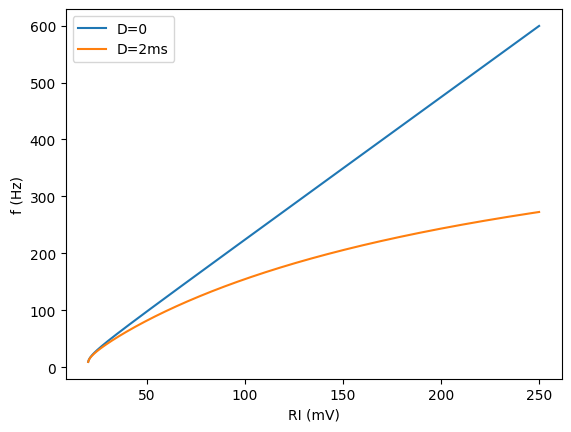

In [11]:
Ivals = np.arange(15,250,0.1) # uA (uA*MOhm = mV)

fig, ax = plt.subplots()
ax.plot(Ivals, fI_analytique(Ivals), label='D=0')
ax.plot(Ivals, fI_analytique(Ivals, 2), label='D=2ms')
ax.legend()
ax.set_xlabel('RI (mV)')
ax.set_ylabel('f (Hz)')

## 1.4 Intégration numérique du modèle Integrate-and-Fire (avec décharge !)

La semaine précédente, nous avons utilisé la méthode d'Euler pour résoudre des équations différentielles. Nous pouvons utiliser cette même technique pour résoudre la dynamique sous-seuil d'un neurone LIF (Leaky Integrate-and-Fire), en rajoutant un mécanisme de détection de spike et de reset.


In [18]:
# Discretization of time
dt = 0.01 # ms (much shorter than tau)
T = 100 # ms (longer than tau, to see how V behaves on long times)
nt = int(T/dt)
t = dt*np.arange(nt)

# Definition of the dynamics
# (function returning dV/dt)

def dVdt(V,I):
    return (R*I-V)/tau

# Iterative integration of 
# the subthreshold dynamics,
# COMBINED WITH threshold
# crossing detection!

Vthreshold = 20. # mV
Vreset = 0. # mV

V = np.zeros(nt)
V[0] = Vreset # start at reset potential (not necessary)

# choose input current

I = 25. # uA

spiketimes = []

# Euler integration
for i in range(nt-1):
    # subthreshold dynamics according to differential equation for V(t)
    V[i+1] = V[i] + dt*dVdt(V[i], I)

    # check whether we hit the threshold!
    if V[i+1]>Vthreshold:
        spiketimes.append(dt*i)
        V[i+1] = Vreset



In [20]:
def Vanalytical(t,I,V0=Vreset):
    return R*I + (V0-R*I)*np.exp(-t/tau)


Text(0, 0.5, 'V (mV)')

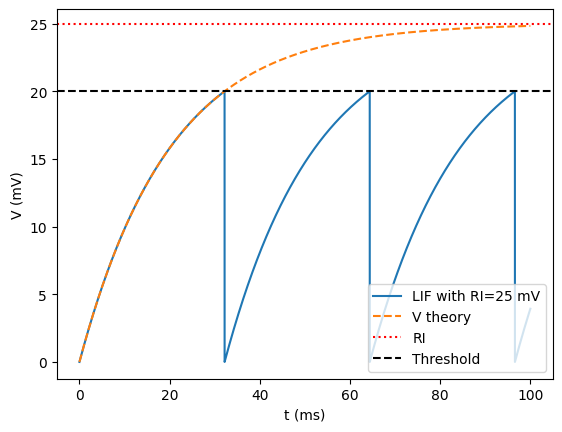

In [21]:
fig, ax = plt.subplots()
ax.plot(t, V, label='LIF with RI=%g mV'%(R*I))
ax.plot(t, Vanalytical(t,I), ls='--', label='V theory')
ax.axhline(R*I, c='r', ls=':', label='RI')
ax.axhline(Vthreshold, c='k', ls='--', label='Threshold')
ax.legend()
ax.set_xlabel('t (ms)')
ax.set_ylabel('V (mV)')



# 2. Décharge irrégulière dans le modèle Integrate-and-Fire

Ajoutons une entrée de bruit à l'équation du neurone Integrate-and-Fire ci-dessus
$$\tau \frac{dV}{dt} = -V + RI + \sigma \sqrt{\tau} \xi(t),$$
où $\sigma$ détermine l'amplitude du bruit et $\xi(t)$ est un processus de bruit blanc gaussien avec une densité de variance unitaire et moyenne zéro. Avec le terme de bruit, c'est désormais une _**équation différentielle stochastique**_.

Le terme de bruit peut par ex. représenter :     
* la stochasticité d'ouverture et de fermeture des canaux ioniques,
* le bruit synaptique (fiabilité de la transmission synaptique),
* les entrées synaptiques externes (inconnues et/ou variables entre les essais).

 
Dans la forme discrétisée telle que nous l'utilisons pour la méthode d'Euler, l'équation devient

$$V_{i+1} = V_i + \Delta t \left[\left(\frac{dV}{dt}\right)_{\rm det}(V_i, t_i) + \sigma\sqrt{\frac{1}{\Delta t \tau}} \eta_i\right],$$

où le premier terme $\left(\frac{dV}{dt}\right)_{\rm det}$ -- évalué à $t_i$ -- représente la dynamique déterministe du LIF, tandis que la stochasticité vient du deuxième terme, où $\eta_i$ est un nombre aléatoire tiré d'une distribution Gaussienne normalisée, avec moyenne zéro et écart-type 1. 

**Indice :** Tirez des nombres aléatoires Gaussiens avec `np.random.normal()`. 


## 2.1 Intégration numérique d'une équation différentielle stochastique : LIF avec  bruit

Écrivez un schéma d'intégration numérique de l'équation différentielle ci-dessus. Utilisez la méthode Euler avec un largeur de pas de temps de $0.1$ ms et intégrez pendant 20 secondes. Enregistrez les temps de spikes et calculez le coefficient de variation après l'intégration. Essayez d'obtenir un $CV$ de 1 à un taux de décharge de 1 spk/sec en variant $I$ et $\sigma$. Tracer le potentiel de la membrane pendant une période de 20 sec. Inspectez l'histogramme de la distribution ISI.  

In [33]:
# Code pour l'intégration Euler

# Discretization of time
dt = 0.01 # ms (much shorter than tau)
T = 1000 # ms (longer than tau, to see how V behaves on long times)
nt = int(T/dt)
t = dt*np.arange(nt)

# Definition of the dynamics
# (function returning dV/dt)

def dVdt(V,I):
    return (R*I-V)/tau

# Iterative integration of 
# the subthreshold dynamics,
# COMBINED WITH threshold
# crossing detection!

Vthreshold = 20. # mV
Vreset = 0. # mV

V = np.zeros(nt)
V[0] = Vreset # start at reset potential (not necessary)

# choose input current

I0  = 19. # mV
sigma = 1. # mV

spiketimes = []

# Euler integration
for i in range(nt-1):
    # subthreshold dynamics according to differential equation for V(t)
    # 1. deterministic part
    V[i+1] = V[i] + dt*dVdt(V[i], I0)

    # 2. add noise part
    etai = np.random.normal()
    V[i+1] += np.sqrt(dt/tau)*sigma*etai


    # check whether we hit the threshold!
    if V[i+1]>Vthreshold:
        spiketimes.append(dt*i)
        V[i+1] = Vreset

Text(0, 0.5, 'V (mV)')

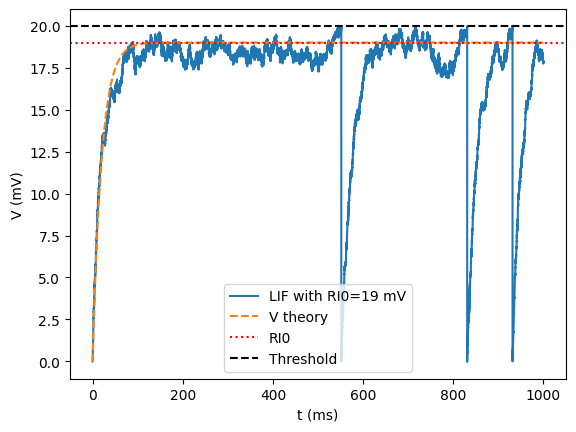

In [34]:
# Plottez le potentiel de membrane V(t)
# avec les spikes superposés pour les
# valeurs de I et de sigma choisies

fig, ax = plt.subplots()
ax.plot(t, V, label='LIF with RI0=%g mV'%(R*I0))
ax.plot(t, Vanalytical(t,I0), ls='--', label='V theory')
ax.axhline(R*I0, c='r', ls=':', label='RI0')
ax.axhline(Vthreshold, c='k', ls='--', label='Threshold')
ax.legend()
ax.set_xlabel('t (ms)')
ax.set_ylabel('V (mV)')


In [ ]:
# Calculez le CV

In [ ]:
# Plottez l'histogramme des ISI

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=aba89c40-4d80-43b4-8007-96b61ce30742' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>